<a href="https://colab.research.google.com/github/diegalvez/AluraStore/blob/main/Por_Diego_AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
#Esse código importa as URLs do git hub, atribuindo cada uma a sua respectiva variavel. url url2 url3 url4
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#Já esse código usa o panda (pl) para ler (read) o csv que foi guardado na sua respectivel variável url url2 url3 url4.
#Depois que essa leitura é feita os dados de cada leitura é armazenado na sua respectivel variável loja loja2 loja3 loja4
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#Esse código exibe na tela as 5 primeiras linhas do conteúdo que está na variável loja2. Isso é importante para observarmos o conteúdo da variável
loja2.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


In [2]:
#Esse código ajusta a proporção de exibição do google colab. O colab estava quebrando a pagina e dificulatando a leitura das tabelas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
#Como nesse caso em especifico todas as tabelas de todas as 4 lojas sao identicas, usei o código abaixo para unir todas as tabelas
#Adicionei a coluna 'loja' em cada DataFrame
#E identifiquei com a string 'Loja 1'  todas as linhas que pertencem a tabela (loja).
#E identifiquei com a string 'Loja 2'  todas as linhas que pertencem a tabela (loja2).
#E identifiquei com a string 'Loja 3'  todas as linhas que pertencem a tabela (loja3).
#E identifiquei com a string 'Loja 4'  todas as linhas que pertencem a tabela (loja4).
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

#No código abaixo finalizei a união dos Dataframes em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#Esse código faz a leitura das primeiras cinco linhas do DataFrame 'todas_lojas' o que me possibilita analisar se a coluna loja foi inserida corretamente
todas_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [4]:
faturamento_por_loja = todas_lojas.groupby('loja')['Preço'].sum()
print (faturamento_por_loja)

loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [5]:
faturamento_formatado = faturamento_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(faturamento_formatado)

loja
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


# 2. Vendas por Categoria


In [6]:
#Esse código calcula a soma de todas as vendas por categoria
vendas_categoria_por_loja = todas_lojas.groupby(['Categoria do Produto', 'loja'])['Preço'].sum().unstack().fillna(0)
vendas_categoria_por_loja = vendas_categoria_por_loja[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']]  # ordena as colunas
print(vendas_categoria_por_loja)


loja                      Loja 1     Loja 2     Loja 3     Loja 4
Categoria do Produto                                             
brinquedos              23993.78   21262.21   25869.20   27015.67
eletrodomesticos       484913.36  464758.13  438984.89  377680.65
eletronicos            572659.23  547773.71  547699.92  545966.86
esporte e lazer         52387.55   46326.09   47456.10   44465.65
instrumentos musicais  121731.69  139987.03  103174.45  100136.50
livros                  11713.92   13454.35   12664.70   12427.77
moveis                 250178.11  235234.68  268095.56  256705.65
utilidades domesticas   16931.48   19662.86   20080.21   20098.83


In [7]:
#Esse código formata a saída deixando os valores no padrão de moeda brasileira
vendas_categoria_formatado = vendas_categoria_por_loja.map(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(vendas_categoria_formatado)

loja                          Loja 1         Loja 2         Loja 3         Loja 4
Categoria do Produto                                                             
brinquedos              R$ 23.993,78   R$ 21.262,21   R$ 25.869,20   R$ 27.015,67
eletrodomesticos       R$ 484.913,36  R$ 464.758,13  R$ 438.984,89  R$ 377.680,65
eletronicos            R$ 572.659,23  R$ 547.773,71  R$ 547.699,92  R$ 545.966,86
esporte e lazer         R$ 52.387,55   R$ 46.326,09   R$ 47.456,10   R$ 44.465,65
instrumentos musicais  R$ 121.731,69  R$ 139.987,03  R$ 103.174,45  R$ 100.136,50
livros                  R$ 11.713,92   R$ 13.454,35   R$ 12.664,70   R$ 12.427,77
moveis                 R$ 250.178,11  R$ 235.234,68  R$ 268.095,56  R$ 256.705,65
utilidades domesticas   R$ 16.931,48   R$ 19.662,86   R$ 20.080,21   R$ 20.098,83


In [8]:
#Esse código calcula a quantidade de vendas de brinquedos por categoria. Ou seja, é a soma da quantidade vendida de3 brinquedos por categoria
quantidade_por_categoria_loja = todas_lojas.groupby(['Categoria do Produto', 'loja']).size().unstack().fillna(0).astype(int)
quantidade_por_categoria_loja = quantidade_por_categoria_loja[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']]  # Ordena as colunas

print(quantidade_por_categoria_loja)

loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas

In [9]:
#Média avaliação das lojas por categoria de produto
media_avaliacoes_loja = todas_lojas.groupby(['Categoria do Produto', 'loja'])['Avaliação da compra'].mean().unstack().fillna(0).round(2)
media_avaliacoes_loja = media_avaliacoes_loja[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']]  # ordena as colunas

print(media_avaliacoes_loja)

loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos               4.08    4.03    4.20    3.99
eletrodomesticos         4.03    4.07    4.01    3.93
eletronicos              4.00    3.97    3.99    4.01
esporte e lazer          3.90    4.07    3.94    4.05
instrumentos musicais    4.05    4.04    4.01    3.91
livros                   3.98    3.95    4.05    4.04
moveis                   3.95    4.09    4.10    4.00
utilidades domesticas    3.75    4.07    4.07    4.01


In [10]:
#Média geral de avaliações das lojas
media_geral_avaliacao = todas_lojas.groupby('loja')['Avaliação da compra'].mean().round(2)
print(media_geral_avaliacao)

loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [11]:
# Agrupa por loja e produto e conta as vendas
vendas_por_produto = todas_lojas.groupby(['loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

def top_n_formatado_por_loja(df, n=None, ordem='desc'):
    resultado = {}
    for loja in df['loja'].unique():
        dados_loja = df[df['loja'] == loja].copy()
        if ordem == 'desc':
            dados_ordenados = dados_loja.sort_values('Quantidade de Vendas', ascending=False)
        else:
            dados_ordenados = dados_loja.sort_values('Quantidade de Vendas', ascending=True)
        if n:
            dados_ordenados = dados_ordenados.head(n)
        produtos_formatados = dados_ordenados.apply(lambda row: f"{row['Produto']} ({row['Quantidade de Vendas']})", axis=1)
        resultado[loja] = produtos_formatados.values
    return pd.DataFrame(dict(sorted(resultado.items())))  # organiza as colunas por ordem de loja

    # Top produtos mais vendidos por loja (todos, ordem decrescente)
top_mais_vendidos = top_n_formatado_por_loja(vendas_por_produto, ordem='desc')
print("Produtos mais vendidos por loja (ordem decrescente):\n")
print(top_mais_vendidos)

# Top produtos menos vendidos por loja (todos, ordem crescente)
top_menos_vendidos = top_n_formatado_por_loja(vendas_por_produto, ordem='asc')
print("\nProdutos menos vendidos por loja (ordem crescente):\n")
print(top_menos_vendidos)

Produtos mais vendidos por loja (ordem decrescente):

                              Loja 1                            Loja 2                            Loja 3                            Loja 4
0                 TV Led UHD 4K (60)     Iniciando em programação (65)                Kit banquetas (57)                     Cama box (62)
1                   Micro-ondas (60)                  Micro-ondas (62)               Mesa de jantar (56)                     Faqueiro (59)
2                 Guarda roupas (60)                      Bateria (61)                    Cama king (56)                    Cama king (56)
3            Secadora de roupas (58)                       Violão (58)                       Cômoda (55)      Dashboards com Power BI (56)
4              Blocos de montar (56)                     Pandeiro (58)              Jogo de panelas (55)                       Cômoda (55)
5                        Cômoda (56)           Secadora de roupas (57)                     Smart TV (54)        

# 5. Frete Médio por Loja


In [12]:
#Média geral de frete por loja
frete_medio_por_loja = todas_lojas.groupby('loja')['Frete'].mean().round(2)
print(frete_medio_por_loja)

loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


In [13]:
frete_medio_por_loja_formatado = frete_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(frete_medio_por_loja_formatado)

loja
Loja 1    R$ 34,69
Loja 2    R$ 33,62
Loja 3    R$ 33,07
Loja 4    R$ 31,28
Name: Frete, dtype: object


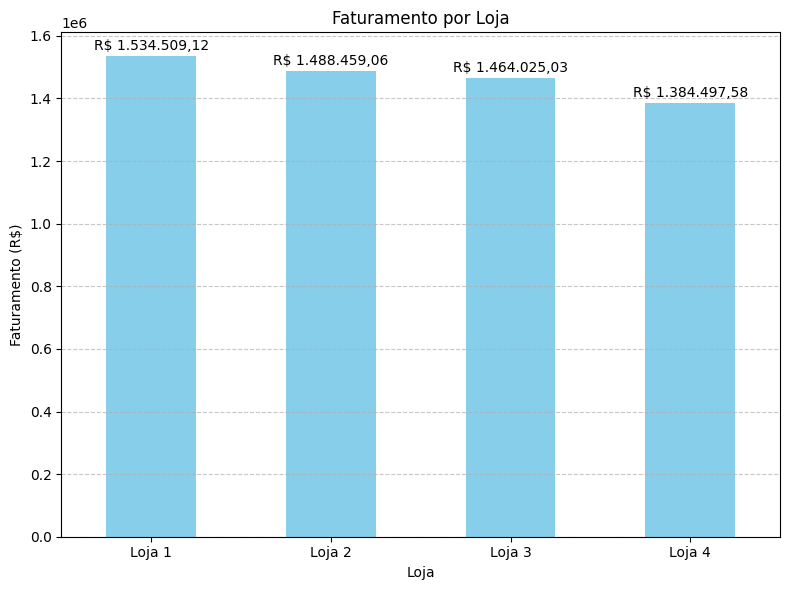

In [14]:
import matplotlib.pyplot as plt

# Gráfico de barras - Faturamento por loja
plt.figure(figsize=(8, 6))
faturamento_por_loja.plot(kind='bar', color='skyblue')

plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for i, valor in enumerate(faturamento_por_loja):
    plt.text(i, valor + 10000, f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

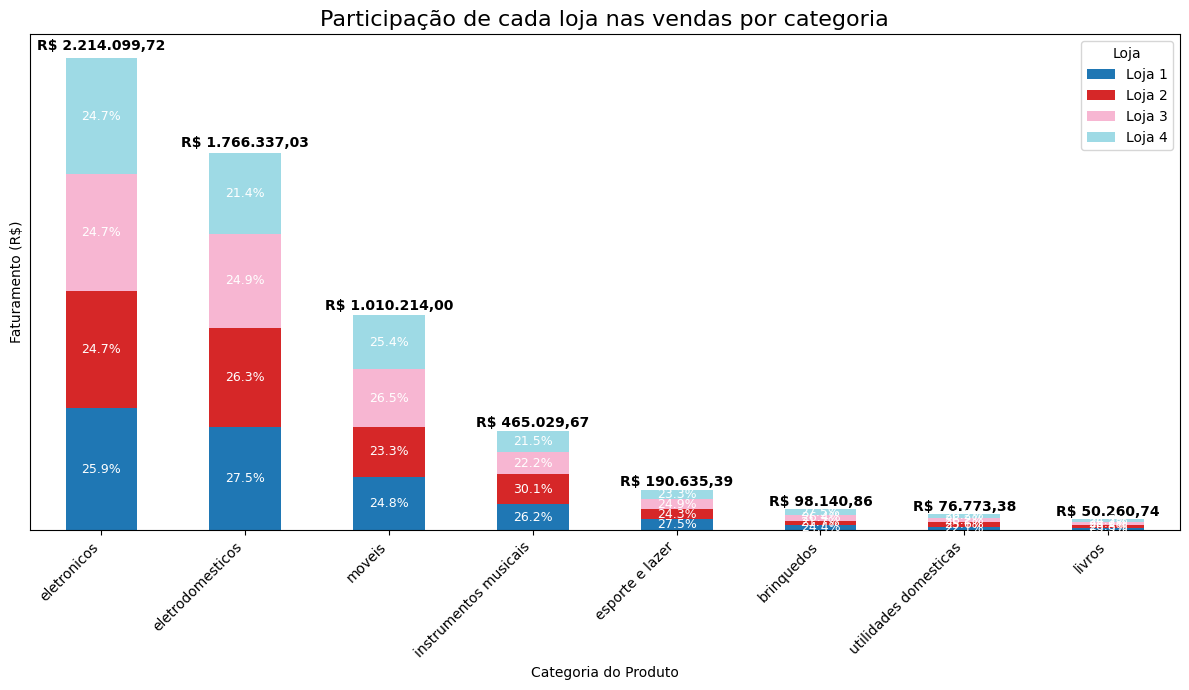

In [15]:
import matplotlib.pyplot as plt

#Ordenando pela soma total (faturamento) em ordem decrescente
vendas_categoria_por_loja = vendas_categoria_por_loja.loc[vendas_categoria_por_loja.sum(axis=1).sort_values(ascending=False).index]

# Criando gráfico de barras empilhadas
ax = vendas_categoria_por_loja.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# Títulos e rótulos
plt.title('Participação de cada loja nas vendas por categoria', fontsize=16)
plt.xlabel('Categoria do Produto')
#plt.ylabel('')  # Remove o título do eixo Y
ax.set_yticks([])  # Remove os valores do eixo Y

# Calculando e exibindo valores totais acima das barras
totais = vendas_categoria_por_loja.sum(axis=1)
for i, total in enumerate(totais):
    ax.text(i, total + total * 0.01, f'R$ {total:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionando as porcentagens dentro das barras
for i, categoria in enumerate(vendas_categoria_por_loja.index):
    total = totais.iloc[i]
    y_offset = 0
    for loja in vendas_categoria_por_loja.columns:
        valor = vendas_categoria_por_loja.loc[categoria, loja]
        if valor > 0:
            percent = valor / total * 100
            ax.text(i, y_offset + valor / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=9, color='white')
            y_offset += valor

# Ajustes finais
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


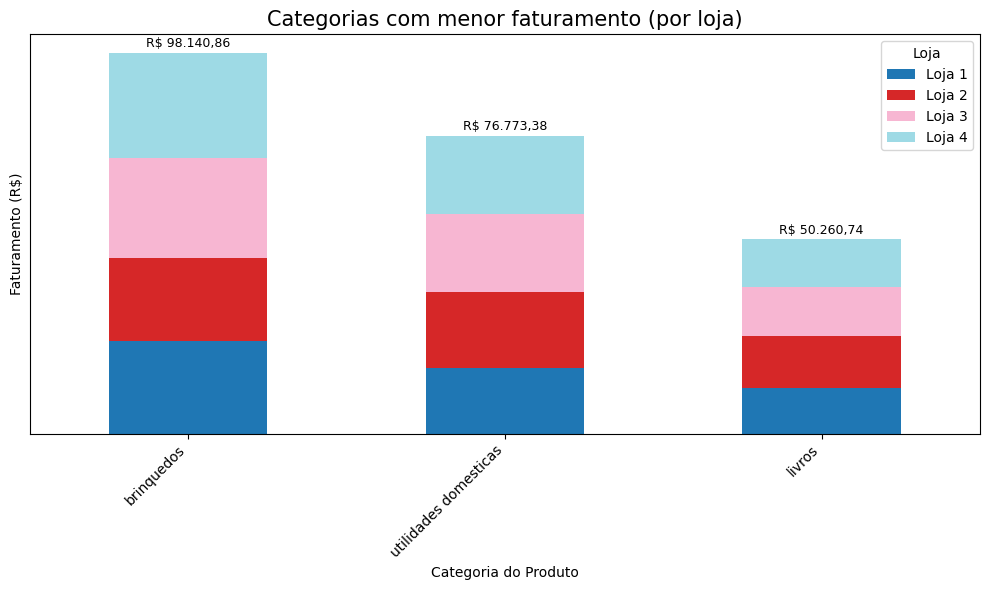

In [16]:
# Soma o total por categoria
categorias_menos_vendidas = vendas_categoria_por_loja.sum(axis=1).nsmallest(3).sort_values(ascending=False).index

# Filtra apenas as categorias de menor venda
dados_menores = vendas_categoria_por_loja.loc[categorias_menos_vendidas]

# Gráfico empilhado com os dados filtrados
ax = dados_menores.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Adiciona os valores em R$ no topo de cada barra
totais = dados_menores.sum(axis=1)
for i, total in enumerate(totais):
    plt.text(i, total + total*0.01, f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center', va='bottom', fontsize=9)

plt.title('Categorias com menor faturamento (por loja)', fontsize=15)
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()



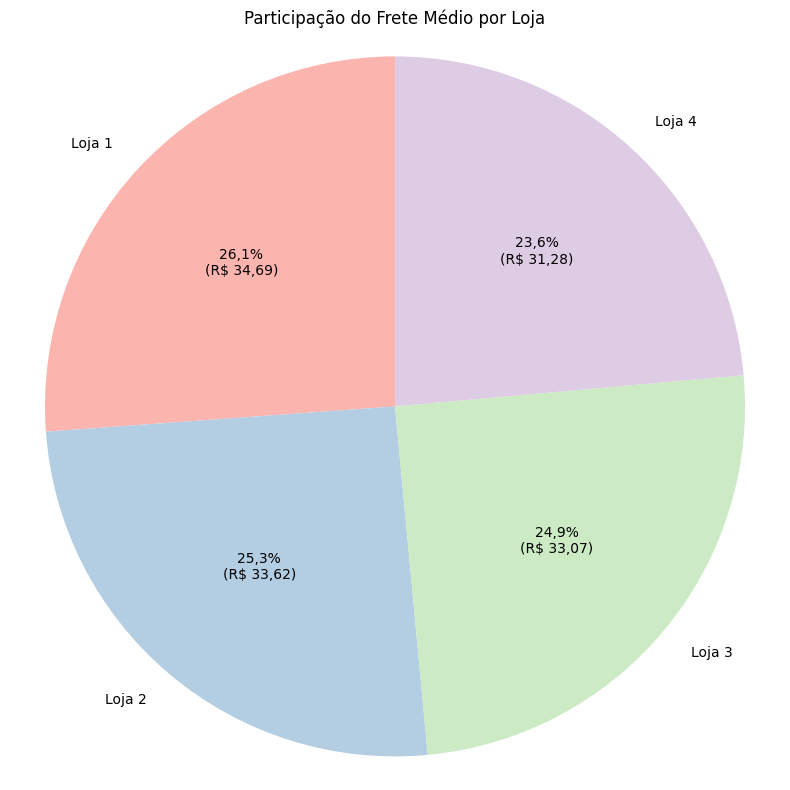

In [17]:
# Gráfico de pizza - Frete médio por loja
plt.figure(figsize=(8, 8))
plt.pie(frete_medio_por_loja,
        labels=frete_medio_por_loja.index,
        autopct=lambda p: f'{p:.1f}%\n(R$ {p * frete_medio_por_loja.sum() / 100:,.2f})'.replace(',', 'X').replace('.', ',').replace('X', '.'),
        startangle=90,
        colors=plt.cm.Pastel1.colors)

plt.title('Participação do Frete Médio por Loja')
plt.axis('equal')  # Deixa o gráfico redondo
plt.tight_layout()
plt.show()

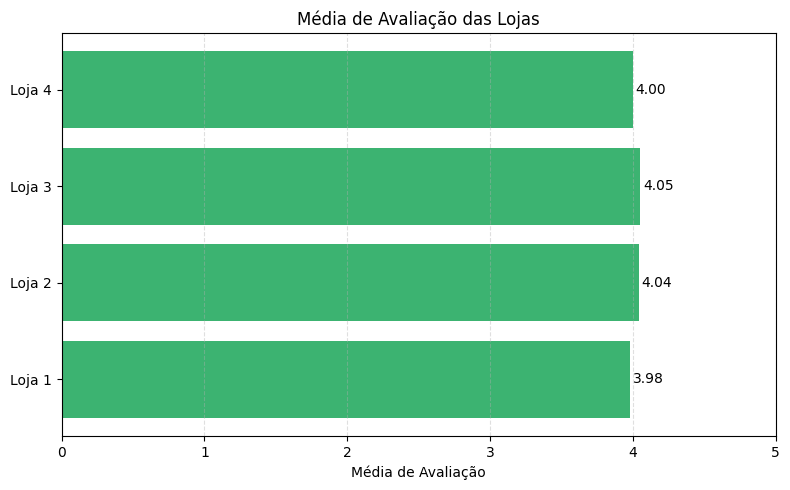

In [18]:
# Calculando a média de avaliação por loja
media_avaliacoes = todas_lojas.groupby('loja')['Avaliação da compra'].mean().round(2)

# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
plt.barh(media_avaliacoes.index, media_avaliacoes.values, color='mediumseagreen')
for i, v in enumerate(media_avaliacoes.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center')  # adiciona o valor ao lado da barra

plt.xlabel('Média de Avaliação')
plt.title('Média de Avaliação das Lojas')
plt.xlim(0, 5)  # escala de 0 a 5
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Relatório Final de Eficiência por Loja

Objetivo

Avaliar a eficiência de quatro lojas com base em múltiplos indicadores de desempenho: quantidade de vendas, avaliação média, ticket médio, frete ao cliente e faturamento total.


---

1. Quantidade Total de Vendas

A Loja 4 foi a que mais vendeu em volume de itens. No entanto, quantidade não implica diretamente em rentabilidade ou satisfação do cliente.


---

2. Ticket Médio

A Loja 4 apresentou o menor ticket médio entre todas, o que indica que, embora venda muito, seus produtos são de menor valor. Já a Loja 1 teve o maior ticket médio, o que contribui diretamente para seu maior faturamento.


---

3. Faturamento Total

Com base no cruzamento entre volume de vendas e ticket médio:

Loja 1 teve o maior faturamento, mesmo com menos vendas.

Loja 4, apesar do alto volume de vendas, teve o menor faturamento total.



---

4. Avaliação Média

Indicador essencial para medir a satisfação do cliente:

Loja 3 teve a melhor avaliação (4,05).

Loja 1 teve a pior avaliação (3,98), o que pode ser sinal de problemas na experiência do cliente, como tempo de entrega, atendimento ou até o valor do frete.



---

5. Frete Médio (pago pelo cliente)

Embora o frete não afete diretamente os custos da loja, ele pode influenciar a decisão de compra e a satisfação do cliente:

Loja 4 apresentou o menor frete médio (R$ 31,28), o que é positivo para conversão.

Loja 1 teve o maior frete médio (R$ 34,69), o que pode justificar sua menor avaliação.



---

Conclusão: Loja Menos Eficiente

Após analisar todos os indicadores, conclui-se que a Loja 4 é a menos eficiente do ponto de vista de negócios.

Apesar de seu alto volume de vendas e baixo custo de frete para o cliente, ela apresenta:

O menor ticket médio

O menor faturamento total

Uma avaliação média inferior à Loja 2 e Loja 3


Isso indica que a estratégia da Loja 4 prioriza volume, mas sacrifica margem, faturamento e qualidade percebida. Para melhorar, seria necessário:

Aumentar o ticket médio (por meio de upsell ou mix de produtos)

Investir em melhorias na experiência do cliente

Monitorar a rentabilidade real por venda
